In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [71]:
# Parameters
learning_rate = 0.005
training_epochs = 1000
display_step = 50

In [72]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]


In [73]:


# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")



In [74]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [75]:


# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)



In [76]:


# Initializing the variables
init = tf.global_variables_initializer()



Epoch: 0050 cost= 0.206236482 W= 0.453084 b= -0.646174
Epoch: 0100 cost= 0.198577359 W= 0.447006 b= -0.602717
Epoch: 0150 cost= 0.191372365 W= 0.441105 b= -0.560568
Epoch: 0200 cost= 0.184594095 W= 0.435382 b= -0.519685
Epoch: 0250 cost= 0.178217083 W= 0.42983 b= -0.48003
Epoch: 0300 cost= 0.172217831 W= 0.424445 b= -0.441568
Epoch: 0350 cost= 0.166573659 W= 0.419222 b= -0.40426
Epoch: 0400 cost= 0.161263734 W= 0.414156 b= -0.368073
Epoch: 0450 cost= 0.156268269 W= 0.409242 b= -0.332974
Epoch: 0500 cost= 0.151568592 W= 0.404475 b= -0.298929
Epoch: 0550 cost= 0.147147253 W= 0.399852 b= -0.265907
Epoch: 0600 cost= 0.142987654 W= 0.395368 b= -0.233877
Epoch: 0650 cost= 0.139074445 W= 0.391018 b= -0.202809
Epoch: 0700 cost= 0.135392979 W= 0.3868 b= -0.172675
Epoch: 0750 cost= 0.131929517 W= 0.382707 b= -0.143446
Epoch: 0800 cost= 0.128671154 W= 0.378738 b= -0.115096
Epoch: 0850 cost= 0.125605762 W= 0.374888 b= -0.0875966
Epoch: 0900 cost= 0.122721910 W= 0.371154 b= -0.0609239
Epoch: 0950 c

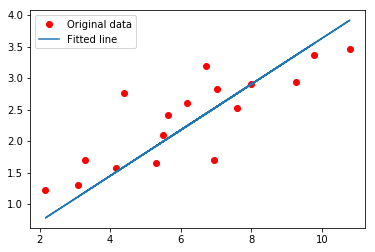

In [77]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [24]:
 #Regression result